## Loading data and observation

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
data = pd.read_csv('../../data/raw/whreport.csv')
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [2]:
# checking how many variable are missing, and also understand the dataframe
ProfileReport(data).to_notebook_iframe()

## Cleaning the Processing data


In [8]:
# selecting the records from 2008 to 2018

process1=data[(data.year >=2008) & (data.year <=2018)]

#inspired by Robvh from stackoverflow
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [9]:
#remove the column that will not be use
process2 = process1.drop(['Life Ladder', 'Log GDP per capita','Social support','Generosity','Perceptions of corruption','Positive affect', 'Negative affect'],axis=1) 

#rename the column 
process3= process2.rename(columns={'Healthy life expectancy at birth':'life_expectancy','Freedom to make life choices':'Freedom_life_choices_in_percentage'})


#convet column Freedom_life_choices_in_percentage to the percentage
process4=process3.assign(Freedom_life_choices_in_percentage=lambda x: x['Freedom_life_choices_in_percentage']*100)

In [10]:
# filling the missing data with the mean base on each area from 2008 to 2018

# one way
process4.groupby('Country name')['life_expectancy'].apply(lambda x:x.fillna(x.mean()))
process4.groupby('Country name')['Freedom_life_choices_in_percentage'].apply(lambda x:x.fillna(x.mean()))
process4.head()
 
#another ways do it 
#process4['life_expectancy']=process4['life_expectancy'].fillna(process4.groupby('Country name')['life_expectancy'].transform('mean'))
#process4['Freedom_life_choices_in_percentage']=process4['Freedom_life_choices_in_percentage'].fillna(process4.groupby('Country name')['Freedom_life_choices_in_percentage'].transform('mean'))


# df['value1']=df.groupby('name')['value'].apply(lambda x:x.fillna(x.mean()))
# inspired from Ashish Anand from stack over flow
#https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

,Country name,year,life_expectancy,Freedom_life_choices_in_percentage
0,Afghanistan,2008,50.80,71.8
1,Afghanistan,2009,51.20,67.9
2,Afghanistan,2010,51.60,60.0
3,Afghanistan,2011,51.92,49.6
4,Afghanistan,2012,52.24,53.1


In [19]:
# delete the palce do not have any records within given time period
process5=process4.dropna()

# making sure the observeration are more accurate, only keeping the country have the data for each year from 2008 to 2018
finalize=process5.groupby('Country name').filter(lambda x : len(x)>10)

#inspire by BENY from stack over flow
#https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition

finalize.reset_index(drop=True, inplace=True)

#export data
finalize.to_csv('../../data/processed/gabrielcha_data.csv',index=None)
finalize

,Country name,year,life_expectancy,Freedom_life_choices_in_percentage
0,Afghanistan,2008,50.80,71.8
1,Afghanistan,2009,51.20,67.9
2,Afghanistan,2010,51.60,60.0
3,Afghanistan,2011,51.92,49.6
4,Afghanistan,2012,52.24,53.1
...,...,...,...,...
699,Zimbabwe,2014,52.38,64.2
700,Zimbabwe,2015,53.80,66.7
701,Zimbabwe,2016,54.40,73.3
702,Zimbabwe,2017,55.00,75.3


### Method chaining now move to project_function py
- [gabrielcha function] https://github.com/data301-2021-summer2/group09-project/blob/7401be865d9c27637492f099667e5b9361afccae/analysis/Gabrielcha/project_functions.py

## Exploratory Data Analysis (EDA)
### My research question 
### 1 Which countries are the top 10 highest average life expectancy and highest average freedom to make life choices represented? 
### 2 How much differences between the gap in No1 and No10 in the list? Which gaps are biggest? 
### 3 What is the relationship between the country which has the highest average life expectancy at birth from 2008 to 2018 and hightest average freedom to make life choices?

In [78]:
sns.set_theme(style="ticks",
              font_scale=1.3 )

In [75]:
#looking for which country have a higher average of lift expetancy and freedom of choice, in the descending order 
graph1=finalize.groupby('Country_name',sort=True)['life_expectancy'].mean().sort_values(ascending=False).reset_index() 
graph2=finalize.groupby('Country_name',sort=True)['Freedom_life_choices_in_percentage'].mean().sort_values(ascending=False).reset_index()

[Text(0, 0, '74.3127'),
 Text(0, 0, '73.3145'),
 Text(0, 0, '72.9691'),
 Text(0, 0, '72.8055'),
 Text(0, 0, '72.6964'),
 Text(0, 0, '72.5855'),
 Text(0, 0, '72.1909'),
 Text(0, 0, '72.1345'),
 Text(0, 0, '71.7345'),
 Text(0, 0, '71.5509')]

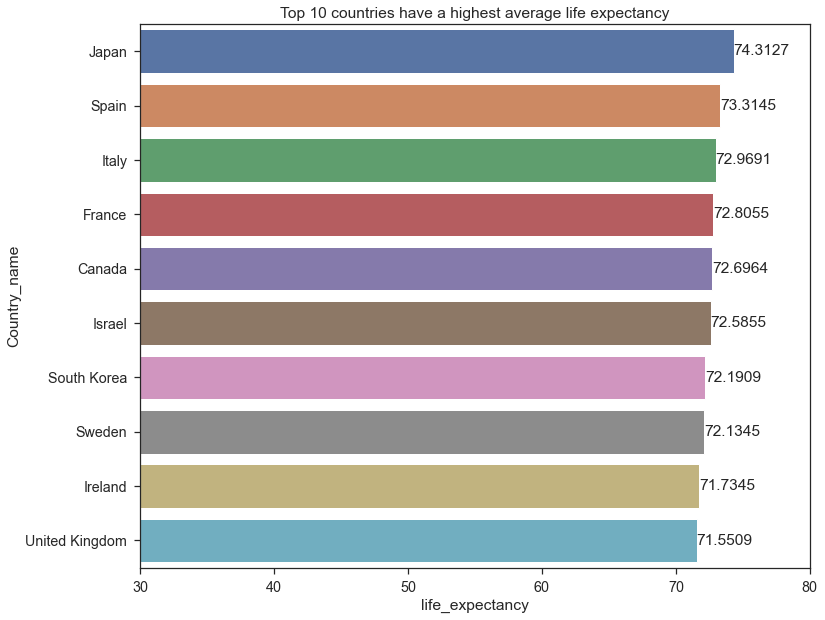

In [77]:
T_10a= list(graph1['Country_name'].unique()) # getting the list of the countries from graph1, which is about life expetancy
fig, ax = plt.subplots(figsize = (12, 10))
sns.barplot(y='Country_name', x='life_expectancy', data = graph1 , order= T_10a[0:10]) # only taking the top 10 
ax.set( title='Top 10 countries have a highest average life expectancy',xlim=(30,80))
ax.bar_label(ax.containers[0])   #putting the lable side by side 

#ax.bar_label(ax.containers[0])
# inspired by tdy from stack over flow
#https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

[Text(0, 0, '94.4455'),
 Text(0, 0, '94.2909'),
 Text(0, 0, '93.0273'),
 Text(0, 0, '92.5182'),
 Text(0, 0, '91.0636'),
 Text(0, 0, '89.9818'),
 Text(0, 0, '88.8909'),
 Text(0, 0, '88.0727'),
 Text(0, 0, '86.8727'),
 Text(0, 0, '86.6727')]

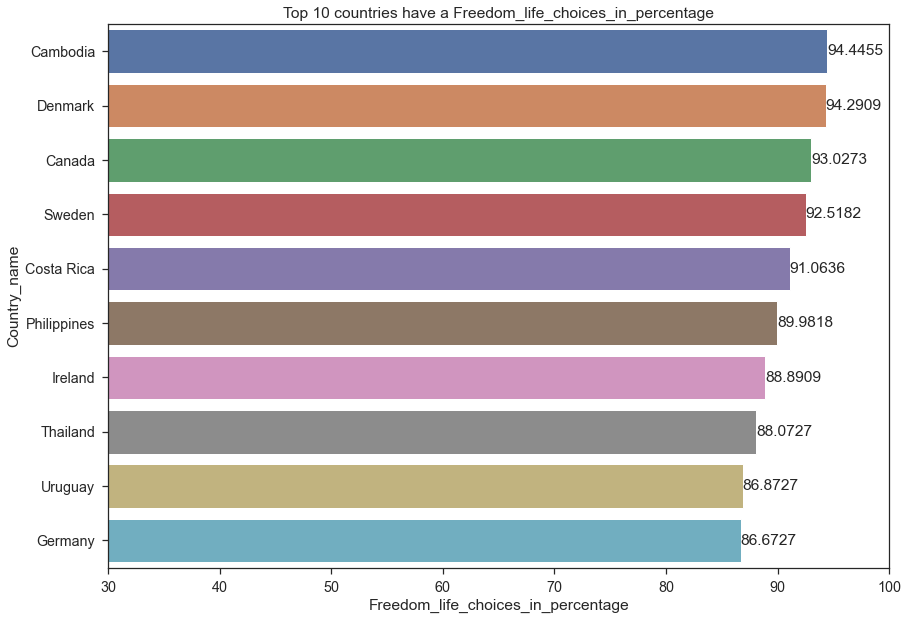

In [67]:
T_10b= list(graph2['Country_name'].unique())   # getting the list of the countries from graph2, which is about freedom of chioce
fig, ax = plt.subplots(figsize = (14, 10))
sns.barplot(y='Country_name', x='Freedom_life_choices_in_percentage', data = graph2 , order= T_10b[0:10])  # only taking the top 10 
ax.set( title='Top 10 countries have a Freedom_life_choices_in_percentage',xlim=(30,100))
ax.bar_label(ax.containers[0])    #putting the lable side by side 

## Observation and Hypothesis
 - It worth to mentions that the differenct between the No1 and No10 in the life expectany is around 3 years differences. However,the differenct between the No1 and No10 in the Freedom_life_choices_in_percentagey is around 8 pecentage differences.
 - Based on the obverstion above,there are only two countries including Ireland and Canada are overlap from these two graphs.
 
### Hypothesis1: 
- The gap in life expetancy from top1 to the last one are less than the relative gap in Freedom_life_choices_in_percentage

### Hypothesis2: 
 - There are some positive relationship between these two variables.

## Testing the Hypothesis

In [111]:
# keeping all the element based on the graph1, since all the value is distinct, and every one has it own value, new column will be add to the graph1, based on the order from graph 1
combin=pd.merge(graph1, graph2, how='left' ,on=['Country_name'])  
combin

,Country_name,life_expectancy,Freedom_life_choices_in_percentage
0,Japan,74.312727,79.909091
1,Spain,73.314545,76.618182
2,Italy,72.969091,61.136364
3,France,72.805455,83.272727
4,Canada,72.696364,93.027273
...,...,...,...
59,Niger,50.883636,75.254545
60,Zimbabwe,50.550909,60.518182
61,Cameroon,49.669091,75.718182
62,Mali,49.485455,68.563636


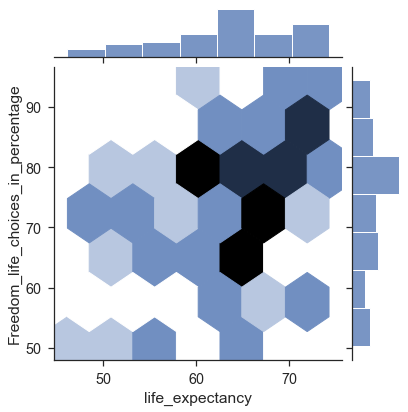

In [130]:
# Comparing the gap between these two varibales,and where does majority data are overlap
ax1=sns.jointplot(data=combin, x="life_expectancy", y="Freedom_life_choices_in_percentage", kind="hex")

- The highest average life_expectancy within the countries are around 74. However, the lowest average is around 45. The gap between these two number is around 20.
- The highest average freedom life choice within the countries are around 94%. However, the lowest average is around 50%. The gap between these two number is around 44%.
- For countries who have a average life_expectancy around 58 to 70, have higher possibility to have a around 60% to 80% freedom of life choice, because the density of those area are high.

[Text(0.5, 1.0, 'The corrlection between the life expectancy and freedom life choice in percentage')]

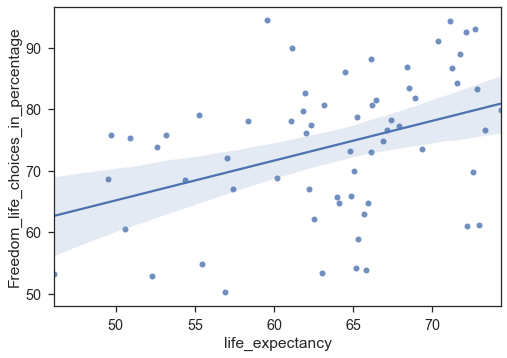

In [134]:
# Correlation line
sns.regplot( x="life_expectancy", y="Freedom_life_choices_in_percentage", data=combin)
ax.set( title='The corrlection between the life expectancy and freedom life choice in percentage')

Text(0.5, 1.0, 'Correlation Matrix of life expentancy and freedom of life choice')

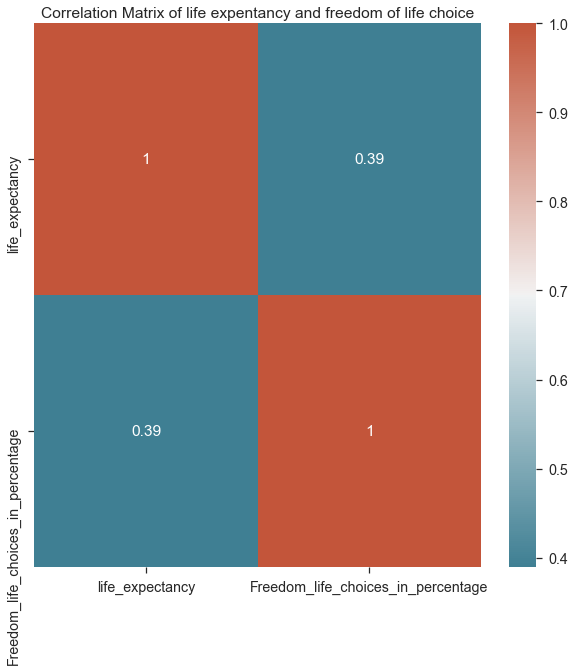

In [135]:
# Correlation Coefficients Matrix
  
fig, ax = plt.subplots(figsize=(10,10))  
corr = combin.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Matrix of life expentancy and freedom of life choice')

- based on these two graph, we can see the corrlation between these two variables are weak positive relationship.

## Conclusion

Hypothesis1: The gap in life expetancy from top1 to the last one are less than the relative gap in Freedom_life_choices_in_percentage. 
Hypothesis2: There are some positive relationship between these two variables.

Both Hypothesis are correct. however the correlation cofficient are weak, which means for the countries who have highest average life expectancy, might have realtively high average on freedom of the life choice

extra finding: For countries who have a average life_expectancy around 58 to 70, have higher possibility to have a around 60% to 80% freedom of life choice, because the density of those area are high.